# Import Resources

In [1]:
import os
import cv2
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import cv2
import matplotlib.pyplot as plt

# READ Data


In [2]:
directory = os.getcwd() + "/FACES"

here we Changed names to images taken from : https://faces.mpdl.mpg.de/imeji/

In [3]:


def rename_images(directory, new_name):
    # Get the list of files in the directory
    files = os.listdir(directory)

    # New name
    new_name = 'Pepito'
    for filename in files:
        # Check if the file is an image
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # Read the image using OpenCV
            image = cv2.imread(os.path.join(directory, filename))

            if filename.split("_")[0] == "004":
                new_name = 'Alberto'
            elif filename.split("_")[0] == "066":
                new_name = 'Juancho'
            elif filename.split("_")[0] == "079":
                new_name = 'Marta'
            elif filename.split("_")[0] == "116":
                new_name = 'Carlos'
            elif filename.split("_")[0] == "140":
                new_name = 'Laura'
            elif filename.split("_")[0] == "168":
                new_name = 'Daniela'

            # Change the image name
            new_filename = '{}_{}'.format(str(new_name).zfill(4), filename.split('_', 1)[1])
            # Save the image with the new name
            cv2.imwrite(os.path.join(directory, new_filename), image)

            os.remove(os.path.join(directory, filename))
            print('Image renamed:', new_filename)


new_name = 'Pepito'
# Call the function to change the names of the images
#rename_images(directory, new_name)

Here we extracted the features from the images, using the pretrained MobileNetV2 model

In [4]:
# Load the pre-trained MobileNetV2 model without the classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# Create a new model that ends at the last convolutional layer
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

X = []  # List to store the extracted features
Y = []  # List to store the labels

for filename in os.listdir(directory):
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif')):
        image_path = os.path.join(directory, filename)
        # Read the image
        image = cv2.imread(image_path)
        # Resize the image to match the expected size for the model
        image = cv2.resize(image, (224, 224))
        # Preprocess the image for the MobileNetV2 model
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = preprocess_input(image)
        # Expand dimensions to match the model's expectations
        image = np.expand_dims(image, axis=0)
        # Obtain the facial features using the MobileNetV2 model
        features = model.predict(image)
        # Get the label from the filename
        label = filename.split("_")[0]
        # Append features and label to X and Y
        X.append(features.flatten())
        Y.append(label)

# Convert X and Y to NumPy arrays
X = np.array(X)
Y = np.array(Y)

1/1 [==============================] - 0s 22ms/step
      0         1    2    3    4    5    6    7    8    9  ...  62711  \
0   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
1   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
2   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
3   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
4   0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
..  ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...   
70  0.0  1.311425  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
71  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
72  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
73  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   
74  0.0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0   

       62712     62713  62714     62715     62716     62717     62718  

# CREATED AND TRAIN THE KNN CLASSIFIER

It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=55)

# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean') #metric=[minkowski , manhattan ]
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# TEST OUT OF SAMPLE DATA

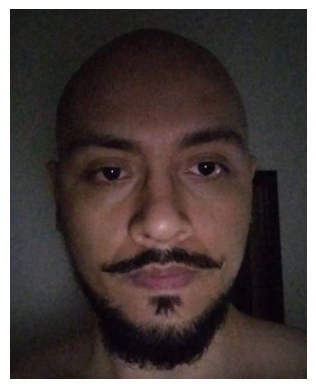

In [30]:
dir_newFaces=directory.split("/")[:-1][0] + "/New FACES" + "/"
test_faces= os.listdir(directory.split("/")[:-1][0] + "/New FACES" + "/" )
# Leer la imagen
image_path = dir_newFaces+ "/" +test_faces[0]
image = cv2.imread(image_path)
# Convertir la imagen de BGR a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Mostrar la imagen utilizando matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Opcional: para ocultar los ejes
plt.show()

In [31]:
image = cv2.imread(image_path)
# Resize the image to match the expected size for the model
image = cv2.resize(image, (224, 224))
# Preprocess the image for the MobileNetV2 model
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = preprocess_input(image)
# Expand dimensions to match the model's expectations
image = np.expand_dims(image, axis=0)
# Obtain the facial features using the MobileNetV2 model
features = model.predict(image)
features = features.flatten()
# Reshape the features for a single sample
features = features.reshape(1, -1)

# Get the prediction from the KNN model
prediction = knn.predict(features)
print("Prediction:", prediction)

1/1 [==============================] - 0s 23ms/step
Prediction: ['Keony']
